# 2D Virtual homo-decoupling in a 2D methyl H-C—HMQC with J-coupling around 35 Hz

In [2]:
import time
import numpy as np
import nmrglue as ng
import MRAi_2D as ma
import Proc_2D as pr
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':25})

2024-09-25 05:21:27.682961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 05:21:39.290876: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Define the path (direction) of the spectrum process in pipe format.
For example, the path to the high resolution methyl 2D H-C—HMQC spectrum of protein MALT1.


In [3]:
%%time
# Replace this path with your actual spectrum file.
spectrum_direction = "Spectra/Malt_CC.ft2"
# Read the file with nmrglue.
Dic , US = ng.pipe.read(spectrum_direction)

CPU times: user 1.1 ms, sys: 319 μs, total: 1.42 ms
Wall time: 5.77 ms


### Call the function with the default direction that runs the trained network for virtual decoupling.
![VD_MRAi.png](Figs/VD_MRAi.png)

In [10]:
def VD_Rec(Dic,US,DNN_dirc):
    # Inverse Pipe processing along the indirect dimension
    dic , us = pr.pipe_generator.iFT_ID(Dic,US)
    # Perform VE (Virtual Echo) in the time domain and apply Fourier Transform
    VE = ma.convertors.US_VE(us,256)
    # VD Recostraction using MRAi
    pred = ma.Production.VD_ID(VE, DNN_dirc)
    # Apply iFT along the indirect dimension and select time domain data along the direct dimension
    ft1 = np.zeros_like(us)
    ft1[:min(int(pred.shape[0]),int(ft1.shape[0]))] = pred[:min(int(pred.shape[0]),int(ft1.shape[0]))]
    # Process along the indirect dimension
    _, VD = pr.pipe_generator.FT_ID(dic,ft1)
    return VD

In [11]:
%%time
# Path to the trained network model
DNN_dirc = "Trained_NN/VD_ID/"

# VD Recostraction with MRAi
VD = VD_Rec(Dic,US,DNN_dirc)

4/4 [==============================] - 0s 2ms/step
CPU times: user 1.1 s, sys: 47.3 ms, total: 1.15 s
Wall time: 1.4 s


### Plotting the spectra.

CPU times: user 72.3 ms, sys: 251 μs, total: 72.6 ms
Wall time: 71.6 ms


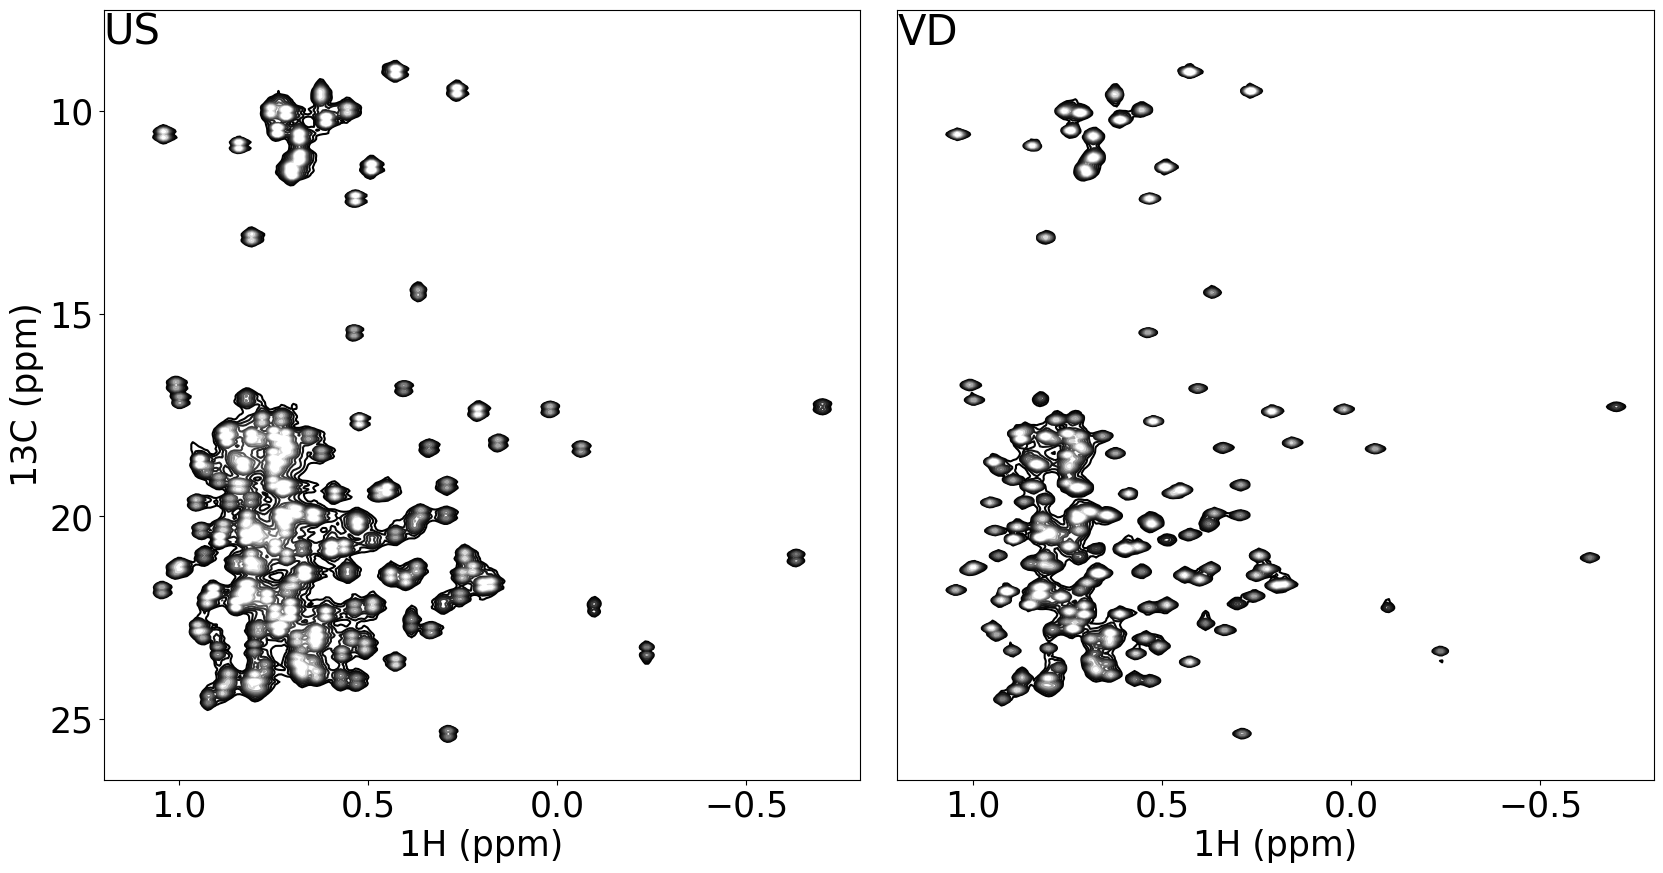

In [9]:
%%time

fig, ax = plt.subplots(1,2,figsize=(2*10,10))
cmap = [plt.cm.Greys_r,plt.cm.Reds_r]       #[+,-] contour map (colors to use for contours)
contour = [0.03,1.3,10]                     #[contour level start value, scaling factor between contour level]
lim = [1.2, -0.8,26.5, 7.5]                 #[xlim from,xlim to,ylim from,ylim to]

pr.PLOTS.subp(ax[0],Dic,US/np.max(US), "US",contour,cmap,lim)
pr.PLOTS.subp(ax[1],Dic,VD/np.max(VD), "VD",contour,cmap,lim)

ax[1].axes.yaxis.set_visible(False)

plt.subplots_adjust(wspace=0.05, hspace=0.05)